#### Import data

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reading the json as a dict
with open('coupons.json') as json_data:
    data = json.load(json_data)

coupons_df = pd.DataFrame.from_dict(data['coupons'])


### 1) cuántos cupones hay de cada tipo

In [2]:
coupons_df['promotion_type'].value_counts()

percent-off        89
free-shipping      43
dollar-off         11
buy-one-get-one     2
free-gift           2
Name: promotion_type, dtype: int64

<AxesSubplot:>

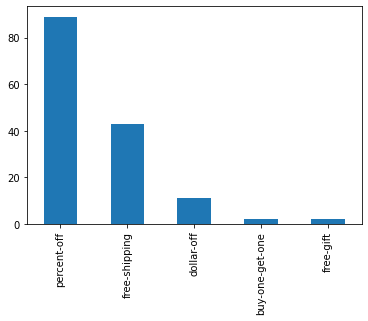

In [3]:
coupons_df['promotion_type'].value_counts().plot.bar()

### 2) de los cupones percent-off, cuantos hay con cada descuento, mínimo, máximo,
promedio

In [4]:
is_percent_off = coupons_df['promotion_type'] == 'percent-off'

percent_off_df = coupons_df[is_percent_off]
print(f'Coupons with promotion "percent-off": {len(percent_off_df)}')

Coupons with promotion "percent-off": 89


In [5]:
print('Percent off distribution:')
print(percent_off_df['value'].value_counts())

Percent off distribution:
40.0    18
50.0    16
25.0    14
20.0    13
70.0     5
30.0     5
80.0     3
60.0     3
10.0     3
75.0     3
15.0     2
65.0     2
8.0      1
33.0     1
Name: value, dtype: int64


<AxesSubplot:>

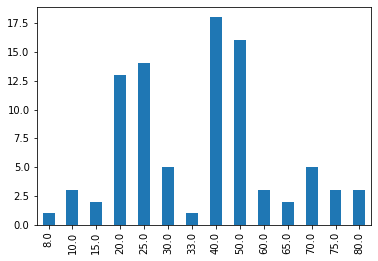

In [6]:
percent_off_df['value'].value_counts().sort_index().plot.bar()

In [7]:
min_percentage = percent_off_df['value'].min()
print(f'Minimum percent off: {min_percentage:.2f}%')

Minimum percent off: 8.00%


In [8]:
max_percentage = percent_off_df['value'].max()
print(f'Maximum percent off: {max_percentage:.2f}%')

Maximum percent off: 80.00%


In [9]:
avg_percentage = percent_off_df['value'].mean()
print(f'Average percent off: {avg_percentage:.2f}%')

Average percent off: 39.39%


### 3) de los cupones dollar-off, cuantos hay con cada descuento, mínimo, máximo,promedio

In [10]:
is_dollar_off = coupons_df['promotion_type'] == 'dollar-off'

dollar_off_df = coupons_df[is_dollar_off]
print(f'Coupons with promotion "dollar-off": {len(dollar_off_df)}')

Coupons with promotion "dollar-off": 11


In [11]:
print('dollar-off distribution:')
print(dollar_off_df['value'].value_counts())

dollar-off distribution:
10.0     6
150.0    2
20.0     1
75.0     1
50.0     1
Name: value, dtype: int64


<AxesSubplot:>

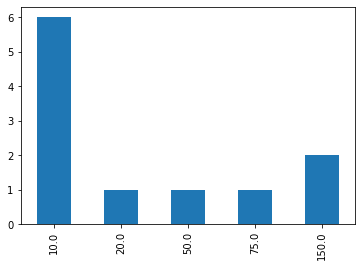

In [12]:
dollar_off_df['value'].value_counts().sort_index().plot.bar()

In [13]:
min_dollar_off = dollar_off_df['value'].min()
print(f'Minimum dollar-off: {min_dollar_off:.2f}$')

Minimum dollar-off: 10.00$


In [14]:
max_dollar_off = dollar_off_df['value'].max()
print(f'Maximum dollar-off: {max_dollar_off:.2f}$')

Maximum dollar-off: 150.00$


In [15]:
avg_dollar_off = dollar_off_df['value'].mean()
print(f'Average dollar-off: {avg_dollar_off:.2f}$')

Average dollar-off: 45.91$


### 4) las mismas estadísticas pero agrupado por retailer

In [16]:
coupons_df['webshop_id'].value_counts()

macys        100
nordstrom     82
nike           9
Name: webshop_id, dtype: int64

<AxesSubplot:>

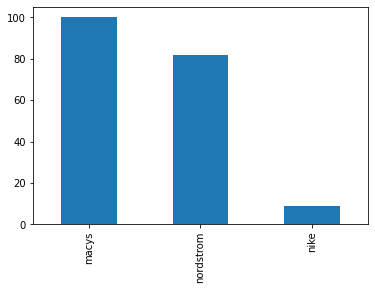

In [17]:
coupons_df['webshop_id'].value_counts().plot.bar()

In [18]:
print('dollar-off distribution grouped by retailer:')
dollar_off_df.groupby(['webshop_id', 'value'])['value'].count()

dollar-off distribution grouped by retailer:


webshop_id  value
macys       10.0     6
            20.0     1
            50.0     1
nike        150.0    1
nordstrom   75.0     1
            150.0    1
Name: value, dtype: int64

<AxesSubplot:xlabel='webshop_id'>

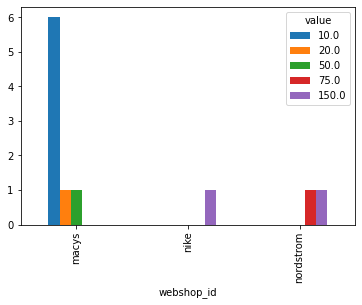

In [19]:
dollar_off_df.groupby(['webshop_id', 'value'])['value'].count().unstack().plot.bar()

In [20]:
print('Minimum dollar-off grouped by retailer:')
dollar_off_df.groupby(['webshop_id'])['value'].min()

Minimum dollar-off grouped by retailer:


webshop_id
macys         10.0
nike         150.0
nordstrom     75.0
Name: value, dtype: float64

In [21]:
print('Maximum dollar-off grouped by retailer:')
dollar_off_df.groupby(['webshop_id'])['value'].max()

Maximum dollar-off grouped by retailer:


webshop_id
macys         50.0
nike         150.0
nordstrom    150.0
Name: value, dtype: float64

In [22]:
print('Average dollar-off grouped by retailer:')
dollar_off_df.groupby(['webshop_id'])['value'].mean()

Average dollar-off grouped by retailer:


webshop_id
macys         16.25
nike         150.00
nordstrom    112.50
Name: value, dtype: float64

### 5) extraer las palabras clave relevantes de ‘title’ y ‘description’

In [46]:
title_strs = " ".join(coupons_df["title"]).split()
title_words = list(filter(lambda word: word.isalpha(), title_strs))
print('Most common words in title')
Counter(title_words).most_common(20)

Most common words in title


[('Off', 129),
 ('Free', 116),
 ('Shipping', 59),
 ('Purchase', 50),
 ('With', 49),
 ('Up', 46),
 ('Select', 43),
 ('to', 35),
 ('Returns', 27),
 ('New', 25),
 ('Your', 22),
 ('Sale', 22),
 ('on', 22),
 ('of', 20),
 ('And', 20),
 ('Gift', 19),
 ('Samples', 17),
 ('Extra', 17),
 ('for', 16),
 ('Deluxe', 15)]

In [47]:
description_strs = " ".join(coupons_df['description']).split()
description_words = list(filter(lambda word: word.isalpha(), description_strs))
print('Most common words in description')
Counter(description_words).most_common(20)

Most common words in description


[('Comment', 756),
 ('Post', 378),
 ('Details', 311),
 ('Get', 296),
 ('to', 261),
 ('with', 246),
 ('Free', 244),
 ('a', 218),
 ('Save', 203),
 ('other', 193),
 ('Include', 189),
 ('nearby', 189),
 ('city', 189),
 ('my', 189),
 ('comment', 189),
 ('help', 189),
 ('Posted', 189),
 ('Another', 189),
 ('Add', 187),
 ('Off', 180)]